# Problem 1

The time independent Schrödinger equation of a charged particle (electron) in a uniform transverse magnetic field $B = B\hat{z}$ and a confining potential $V = V(x, y)$ can be written as

$$
\hat{H}\Psi = E\Psi
$$

where

$$
\hat{H} = \frac{1}{2m_e}[p - eA]^2 + V(x, y)
$$

Here you may choose

$$
A = (-\frac{1}{2}By, \frac{1}{2}Bx, 0)
$$

and $V(x, y) = \frac{1}{2}m_e\omega_0^2(x^2 + y^2)$. Numerically integrating the equation by any standard method obtain the electronic spectrum for first few principal quantum number as the magnetic field strength $B$ is varies. You may take the $\hbar\omega_0 = 4mev$, and $m_e = 0.067m$, where $m$ is the bare mass of the electron. In the plot the unit of the magnetic field should be taken in Tesla and the unit of energy should be taken $meV$. You should at least plot first five lowest energy wave-functions and point out any degeneracy in the problem.


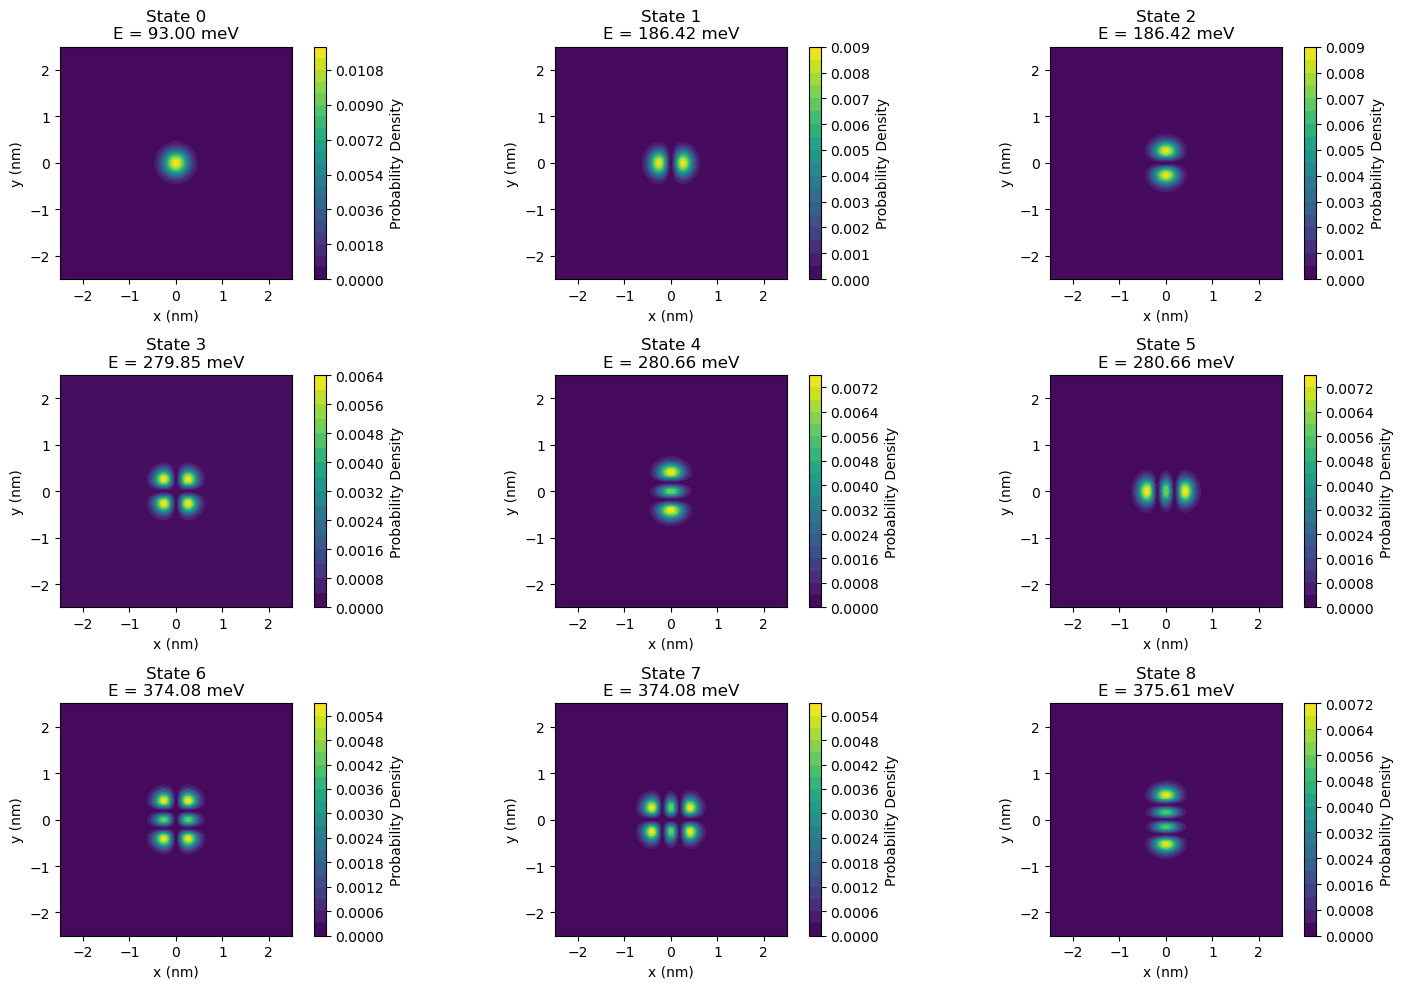

In [48]:


"""
Created on Wed Apr  9 22:42:45 2025

@author: Prateek
"""


import numpy as np
from scipy.sparse import diags, kron, eye, csr_matrix
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# Parameters
B = 25 # Tesla
e=1 
m=1
m_e = 0.067*m  # Effective mass
w_0=6.08 #1/(ps)
w = (e*B)/m_e  # Frequency
hbar = 0.6582  # Reduced Planck constant


L = 2.5  # Grid size
N = 100  # Points per dimension
e = 1  # Elementary charge

# Create 1D grid
x = np.linspace(-L, L, N)
dx = x[1] - x[0]
X, Y = np.meshgrid(x, x, indexing='ij')

# Vector potential A = (-By/2, Bx/2, 0)
Ax = -0.5 * B * Y
Ay = 0.5 * B * X

# Kinetic energy operator (1D)
T = (-hbar**2/(2*m_e*dx**2)) * diags([-2*np.ones(N), np.ones(N-1), np.ones(N-1)],
                                    [0, -1, 1],
                                    shape=(N,N))

# Momentum operators (1D)
Px = (-1j*hbar/(2*dx)) * diags([-np.ones(N-1), np.ones(N-1)], [-1, 1], shape=(N,N))
Py = Px.copy()

# Identity matrix
I = eye(N)

# Construct Hamiltonian components
H_kinetic = kron(T, I) + kron(I, T)  # Shape N²×N²

# Convert meshgrid arrays to sparse diagonal matrices
Ax_diag = diags(Ax.ravel(), 0, shape=(N*N, N*N))
Ay_diag = diags(Ay.ravel(), 0, shape=(N*N, N*N))

# Magnetic field terms
H_Bx = - (e*hbar/m_e) * kron(Px, I) @ Ay_diag  # -e/m p_x A_y
H_By = - (e*hbar/m_e) * kron(I, Py) @ Ax_diag  # -e/m p_y A_x
H_A2 = (e**2/(2*m_e)) * diags((Ax**2 + Ay**2).ravel(), 0, shape=(N*N, N*N))  # e²/2m A²

# Potential energy
V = 0.5 * m_e * w_0**2 * (X**2 + Y**2)
H_pot = diags(V.ravel(), 0, shape=(N*N, N*N))

# Total Hamiltonian - ensure all terms are same shape
H = csr_matrix(H_kinetic + H_Bx + H_By + H_A2 + H_pot)

# Diagonalize
eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')

### to sort eigenvectors in ascending order
idx=eigenvalues.argsort()[:]
eigenvalues=eigenvalues[idx]
eigenvectors=eigenvectors[:,idx]


# Create figure with subplots
plt.figure(figsize=(15, 10))

# Plot first 5 eigenstates
for i in range(9):
    plt.subplot(3, 3, i+1)  # 2 rows, 3 columns layout
    psi = eigenvectors[:, i].reshape(N, N)
    contour = plt.contourf(X, Y, np.abs(psi)**2, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Probability Density')
    plt.title(f'State {i}\nE = {eigenvalues[i]:.2f} meV')
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()


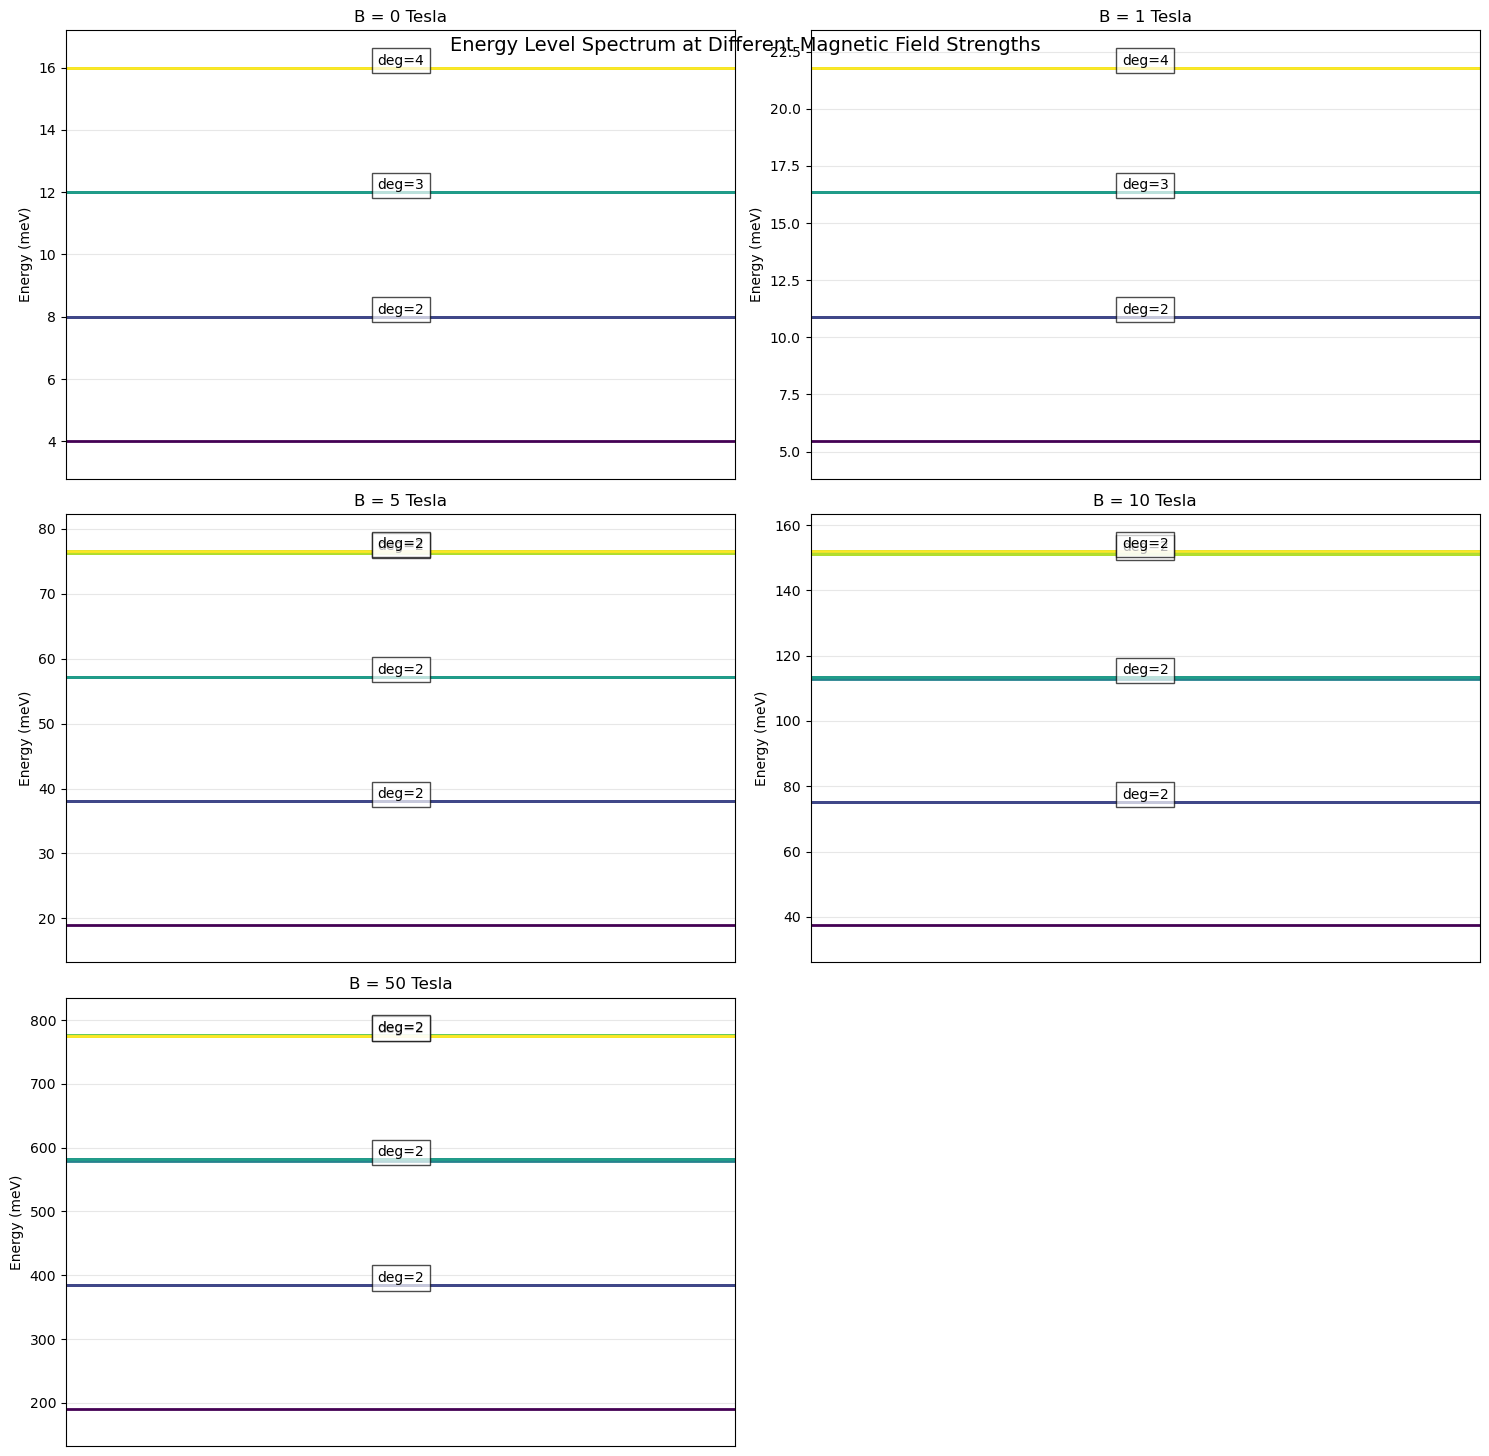

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  9 23:07:04 2025

@author: Prateek
"""

import numpy as np
import matplotlib.pyplot as plt


  # Energy data for different B values
energy_data = {
    0: [ 4.00027963 , 7.99902654 , 7.99902654, 11.99777346, 11.99524486, 11.99524486
     ,15.99309928, 15.99399177 ,15.99309928, 15.99399177],
    1: [ 5.44901832 ,10.89822672, 10.89822672 ,16.34778913 ,16.34778913, 16.34743512,
     21.79771384, 21.79771384 ,21.79699753, 21.79699753],
    5: [18.98836948, 38.04300046, 38.04300046 ,57.22422885 ,57.09763145, 57.22422885
     ,76.52069328 ,76.27885983 ,76.27885983 ,76.52069328],
    10: [ 37.48184714 , 75.21656247 , 75.21656247 ,113.41388435, 112.95127779,
     113.41388435, 151.99376412 ,151.14859967, 151.14859967, 151.99376412],
    50: [190.89076649 ,384.78234848 ,384.78234848, 581.7685385 , 578.67393046,
     581.7685385 , 776.62627311 ,776.62627311 ,775.66012048, 775.66012048]
}


# Create figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()  # Flatten the array of axes

# Custom color cycle for better visibility
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Plot each B value in a separate subplot
for idx, (B, energies) in enumerate(energy_data.items()):
    ax = axs[idx]
    
    # Plot each energy level as a horizontal line
    for i, E in enumerate(energies):
        ax.axhline(y=E, color=colors[i], linestyle='-', linewidth=2)
    
    # Mark degeneracies
    unique_energies = np.unique(np.round(energies, 2))
    for E in unique_energies:
        count = sum(np.round(energies, 2) == E)
        if count > 1:
            ax.text(0.5, E, f'deg={count}', ha='center', va='bottom', 
                   bbox=dict(facecolor='white', alpha=0.7))
    
    # Formatting
    ax.set_title(f'B = {B} Tesla', fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_ylabel('Energy (meV)', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Remove x-axis ticks and labels since we only need horizontal lines
    ax.set_xticks([])
    
    # Adjust y-axis limits for better visibility
    y_padding = 0.1 * (max(energies) - min(energies))
    ax.set_ylim(min(energies)-y_padding, max(energies)+y_padding)

# Remove the empty subplot (since we have 5 plots in 3x2 grid)
fig.delaxes(axs[-1])

# Add overall title
plt.suptitle('Energy Level Spectrum at Different Magnetic Field Strengths', 
             fontsize=14, y=0.95)

plt.tight_layout()
plt.show()

### Conclusion-Some of the degeneracy is lifted on increasing Magnetic field 

### Analytical plot of 2-D harmonic oscillator

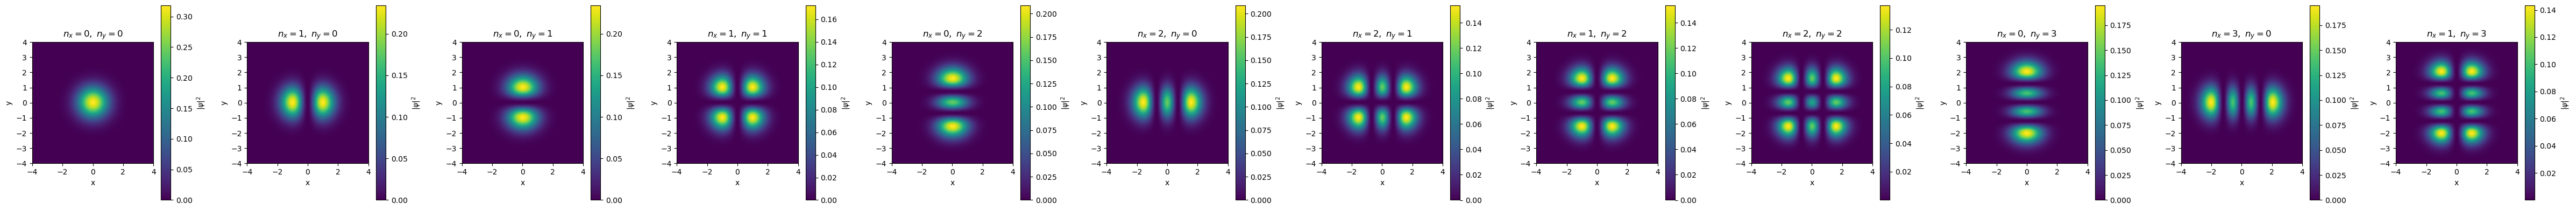

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial

# physical parameters (choose units so ℏ=1, m=1, ω=1 for simplicity)
hbar = 1.0
m    = 1.0
omega = 1.0

# oscillator length
l0 = np.sqrt(hbar/(m*omega))

def psi_nx_ny(n_x, n_y, x, y):
    """
    2D harmonic-oscillator eigenfunction psi_{n_x,n_y}(x,y).
    """
    # dimensionless coords
    xi, yi = x/l0, y/l0
    
    # Hermite polys
    Hx = hermite(n_x)(xi)
    Hy = hermite(n_y)(yi)
    
    # normalization
    Nx = 1.0/np.sqrt((2**n_x)*factorial(n_x)*np.sqrt(np.pi)*l0)
    Ny = 1.0/np.sqrt((2**n_y)*factorial(n_y)*np.sqrt(np.pi)*l0)
    
    return Nx * Ny * Hx * Hy * np.exp(-0.5*(xi**2 + yi**2))

# grid
Npix = 300
x = np.linspace(-4*l0, 4*l0, Npix)
y = np.linspace(-4*l0, 4*l0, Npix)
X, Y = np.meshgrid(x, y)

# pick some (n_x,n_y) states to plot
levels = [(0,0), (1,0), (0,1), (1,1),(0,2),(2,0),(2,1),(1,2),(2,2),(0,3),(3,0),(1,3)]

fig, axes = plt.subplots(1, len(levels), figsize=(4*len(levels),4))
for ax, (nx, ny) in zip(axes, levels):
    psi = psi_nx_ny(nx, ny, X, Y)
    prob = np.abs(psi)**2
    im = ax.imshow(prob,
                   extent=(x.min(), x.max(), y.min(), y.max()),
                   origin='lower',
                   aspect='equal')
    ax.set_title(f"$n_x={nx},\\;n_y={ny}$")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    fig.colorbar(im, ax=ax, label=r"$|\psi|^2$")
plt.tight_layout()
plt.show()
